# <center> FINAL PROJECT: STUDENT PERFORMANCE FACTORS <center> 

## A. INFORMATION

### I. Member Information


<center>

|No. | Name          | Student ID   | Email                    |
|:--:|:-------------:|:------------:|:------------------------:|
| 1  | Võ Hùng Khoa  | 22127202     | vhkhoa22@clc.fitus.edu.vn|
| 2  | Vũ Tuấn Hùng  | 22127137     | vthung22@clc.fitus.edu.vn|
| 3  | Huỳnh Tấn Đạt | 22127059     | htdat222@clc.fitus.edu.vn|

<center>

### II. Project Information 
#### 1. Project Introduction 
- In this project, students are required to select a public dataset, such as those available on *Kaggle*, related to a topic of interest to their group. The project involves exploring the dataset, which often includes preprocessing steps, and identifying meaningful questions that can be answered using the data. Students are then tasked with preprocessing and analyzing the data to address each question effectively, demonstrating their ability to draw insights and conclusions from the analysis.

#### 2. Topic
- The chosen topic: **Student Performance Factors** 

- Using a dataset that covers study habits, attendance, parental involvement, and other factors, the project aims to analyze how these aspects impact students' exam performance.


## B. Project Details

### I. Import Library and Read Dataset

#### 1. Import Library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
# Import more library if you need it
%matplotlib inline

#### 2. Read Dataset

In [46]:
data =  pd.read_csv("./StudentPerformanceFactors.csv")
data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

### II. Data Preprocessing

#### 1. Hanlde Null and Duplicate Values

Looking at the big picture to identify what to do with the dataset!?

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

There are some null values in the dataset, so we are going to drop them all!

In [48]:
# Drop null-value
data.dropna(axis = 0 , inplace=True)
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Then, we are going to drop the duplicate values!

In [49]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

#### 2. Convert categorical data type to numeric data type

Looks clean! However, after completing the data preprocessing, we need to handle the object values and convert them to numeric values. Before that, we need to learn more about the dataset we are going to handle.

<!-- <center> -->

| Attribute                | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Hours_Studied            | Number of hours spent studying per week.                                    |
| Attendance               | Percentage of classes attended.                                             |
| Parental_Involvement     | Level of parental involvement in the student's education (Low, Medium, High).|
| Access_to_Resources      | Availability of educational resources (Low, Medium, High).                 |
| Extracurricular_Activities| Participation in extracurricular activities (Yes, No).                      |
| Sleep_Hours              | Average number of hours of sleep per night.                                 |
| Previous_Scores          | Scores from previous exams.                                                 |
| Motivation_Level         | Student's level of motivation (Low, Medium, High).                          |
| Internet_Access          | Availability of internet access (Yes, No).                                  |
| Tutoring_Sessions        | Number of tutoring sessions attended per month.                             |
| Family_Income            | Family income level (Low, Medium, High).                                   |
| Teacher_Quality          | Quality of the teachers (Low, Medium, High).                               |
| School_Type              | Type of school attended (Public, Private).                                  |
| Peer_Influence           | Influence of peers on academic performance (Positive, Neutral, Negative).   |
| Physical_Activity        | Average number of hours of physical activity per week.                      |
| Learning_Disabilities    | Presence of learning disabilities (Yes, No).                               |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate).   |
| Distance_from_Home       | Distance from home to school (Near, Moderate, Far).                         |
| Gender                   | Gender of the student (Male, Female).                                       |
| Exam_Score               | Final exam score.                                                           |

<!-- <center> -->

In [50]:
# Handle each categorical columns

ordinal_mapping = {"Low": 0, "Medium": 1, "High": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(ordinal_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(ordinal_mapping)

education_mapping = {"High School": 0, "College": 1, "Postgraduate": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(education_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(education_mapping)

distance_mapping = {"Near": 0, "Moderate": 1, "Far": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(distance_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(distance_mapping)

sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(sentiment_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(sentiment_mapping)

# Handle remaining categorical columns
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

In [51]:
data.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    2   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 0   
1                           0            8               59                 0   
2                           1            7               91                 1   
3                           1            8               98                 1   
4                           1            6               65                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                0                  0              0                1   
1                0                  2              1                1   
2                0                  2              1                1   
3                0                  1              1                1   
4                0                  3              1                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            0               2                  3                      0   
1            0               0                  4                      0   
2            0               1                  4                      0   
3            0               0                  4                      0   
4            0               1                  4                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       0          67  
1                         1                   1       1          61  
2                         2                   0       0          74  
3                         0                   1       0          71  
4                         1                   0       1          70

In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

Apply some logical to the dataset

In [53]:
data = data[(data["Exam_Score"] <= 100) & (data["Exam_Score"] >= 0)]
data = data[(data["Previous_Scores"] <= 100) & (data["Previous_Scores"] >= 0)]

In [54]:
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6377.000000  6377.000000           6377.000000          6377.000000   
mean       19.976008    80.018034              1.085620             1.098165   
std         5.985283    11.549434              0.694942             0.698689   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              1.000000             1.000000   
50%        20.000000    80.000000              1.000000             1.000000   
75%        24.000000    90.000000              2.000000             2.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6377.000000  6377.000000      6377.000000   
mean                     0.596832     7.035126        75.063353   
std                      0.490572     1.468091        14.399766   
min                      0.000000     4.000000        50.000000   
25%                      0.000000     6.000000        63.000000   
50%                      1.000000     7.000000        75.000000   
75%                      1.000000     8.000000        88.000000   
max                      1.000000    10.000000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6377.000000      6377.000000        6377.000000    6377.000000   
mean           0.908107         0.075898           1.494747       0.787831   
std            0.695720         0.264855           1.233300       0.743430   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6377.000000  6377.000000     6377.000000        6377.000000   
mean          1.197115     0.304846        1.191626           2.972714   
std           0.601027     0.460378        0.756386           1.029006   
min           0.000000     0.000000        0.000000           0.000000   
25%           1.000000     0.000000        1.000000           2.000000   
50%           1.000000     0.000000        1.000000           3.000000   
75%           2.000000     1.000000        2.000000           4.000000   
max           2.000000     1.000000        2.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6377.000000               6377.000000         6377.000000   
mean                0.104751                  0.705504            0.503685   
std                 0.306257                  0.780581            0.670465   
min                 0.000000                  0.000000            0.000000   
25%                 0.000000                  0.000000            0.000000   
50%                 0.000000                  1.000000            0.000000   
75%                 0.000000                  1.000000            1.000000   
max                 1.000000                  2.000000            2.000000   

            Gender   Exam_Score  
count  6377.000000  6377.000000  
mean      0.421672    67.246825  
std       0.493865     3.891637  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   100.000000

All columns are in well format so now we can move on the next step!!! 

### III. Exploratory Data Analysis - EDA

#### 1. Overall

In [55]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Comment: 

#### 2. Additional Visualizations

**Understanding the Distribution of Numerical Features**

To gain insights into the dataset, we analyze the distribution of key numerical features using histograms with kernel density estimates (KDE). This helps us:

1. Identify the overall shape of each distribution (e.g., normal, skewed, bimodal).
2. Detect potential anomalies or outliers in the data.
3. Compare the variability across different features.

**Key numerical features include:**

- **Hours_Studied**: Total hours dedicated to studying.
- **Attendance**: Attendance percentage.
- **Access_to_Resources**: Availability of educational resources
- **Previous_Scores**: Past performance scores.
- **Parental_Involvement**: Level of parental involvement in the student's education.
- **Tutoring_Sessions**: Number of tutoring sessions attended per month.
- **Exam_Score**: Final exam score (target variable).

The following visualization will create one plot for each feature to reveal these patterns.

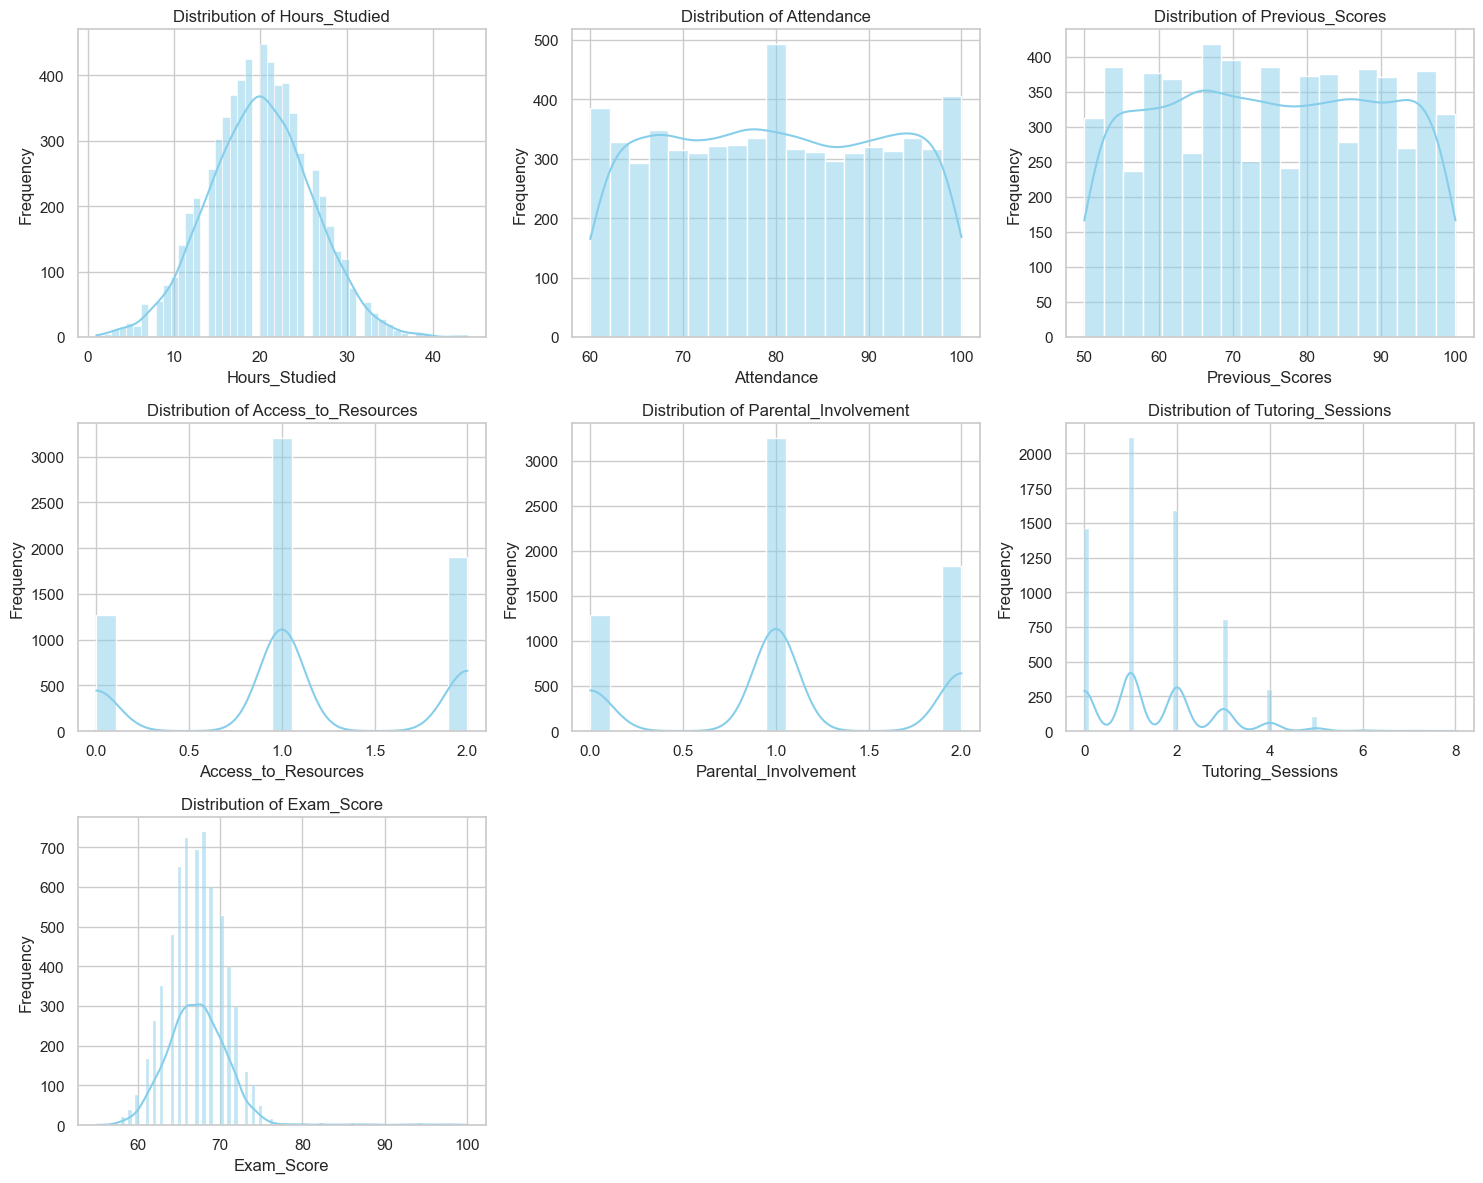

In [56]:
# Set plot aesthetics
sns.set_theme(style="whitegrid")

# Key features to visualize
key_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Access_to_Resources', 'Parental_Involvement', 'Tutoring_Sessions', 'Exam_Score']

# Create subplots for numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Frequency")

# Turn off the last empty subplots if the number of features is less than the number of subplots
for i in range(len(key_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show();

**Correlation Analysis of Numerical Features**

Understanding relationships between numerical features is crucial for data analysis. A **correlation heatmap** visualizes these relationships, where:

- **Values close to +1** indicate strong positive correlation (e.g., as one feature increases, so does the other).
- **Values close to -1** indicate strong negative correlation (e.g., as one feature increases, the other decreases).
- **Values near 0** suggest no significant relationship.
  
This helps us identify which features might influence the target variable (`Exam_Score`) or are highly related to one another.

Display the correlation matrix as a table

In [57]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original data
encoded_data = data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode all categorical columns
categorical_columns = encoded_data.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Display the correlation matrix as a styled table
correlation_table = correlation_matrix.style.background_gradient(cmap='coolwarm')

# Show the table
correlation_table


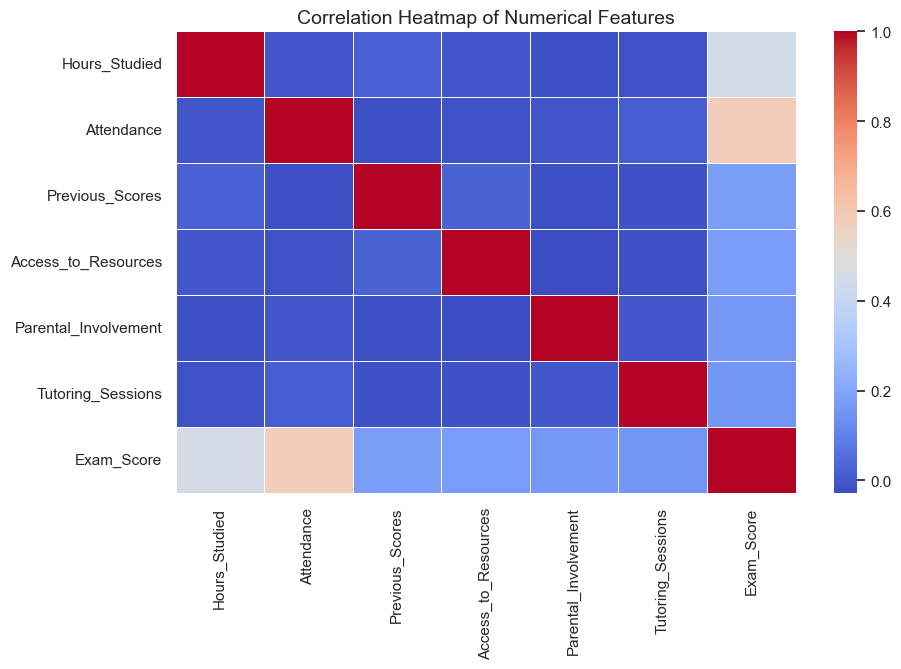

In [58]:
# Compute the correlation matrix for numerical features
correlation_matrix = data[key_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and labels
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()


**Box Plot of Exam Scores by Categorical Features**

A box plot is useful for understanding the distribution and variability of a numerical variable across different categories. Here, we analyze how `Exam_Score` varies based on:

- **Gender**: Are there differences in performance between male and female students?
- **Extracurricular_Activities**: Do students who participate in extracurricular activities perform better?

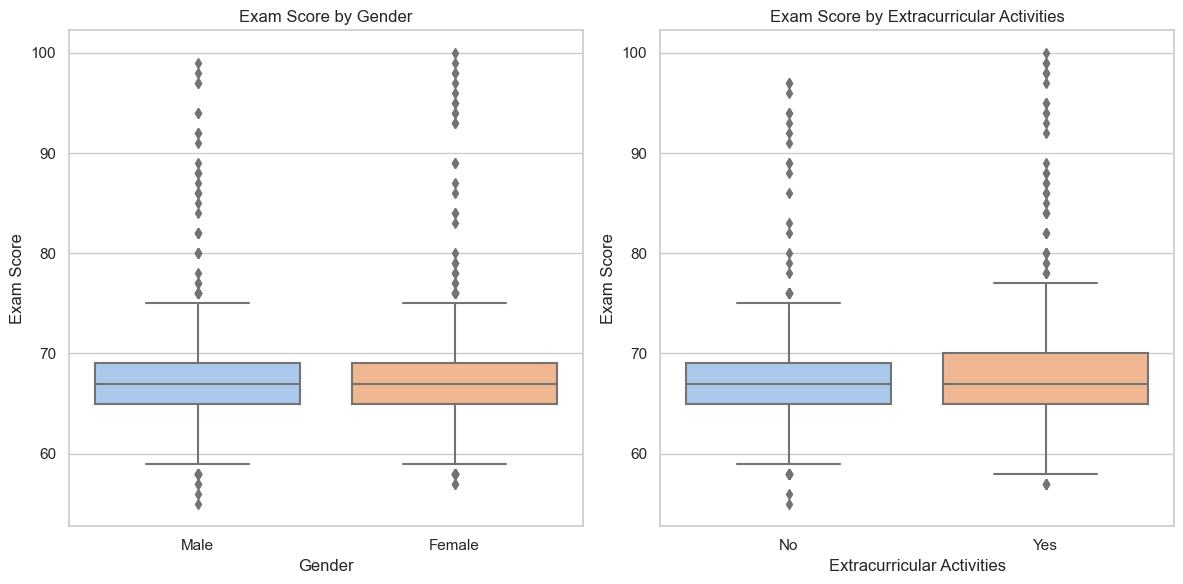

In [59]:
# Ensure Gender and Extracurricular_Activities columns are properly encoded
df = data.copy()
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({0: 'No', 1: 'Yes'})

# Drop rows where Gender or Extracurricular_Activities are NaN
df = df.dropna(subset=['Gender', 'Extracurricular_Activities'])

# Create box plots for Exam_Score by categorical features with updated labels
plt.figure(figsize=(12, 6))

# Gender vs Exam_Score
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='pastel')
plt.title('Exam Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam Score')

# Extracurricular Activities vs Exam_Score
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score', palette='pastel')
plt.title('Exam Score by Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show();

**Scatter Plot of Exam Scores vs Numerical Features**

Scatter plots reveal trends and relationships between two continuous variables. We'll examine how `Exam_Score` relates to:

- **Hours_Studied**: Does more studying lead to higher scores?
- **Previous_Scores**: Do past performance scores predict final exam results?

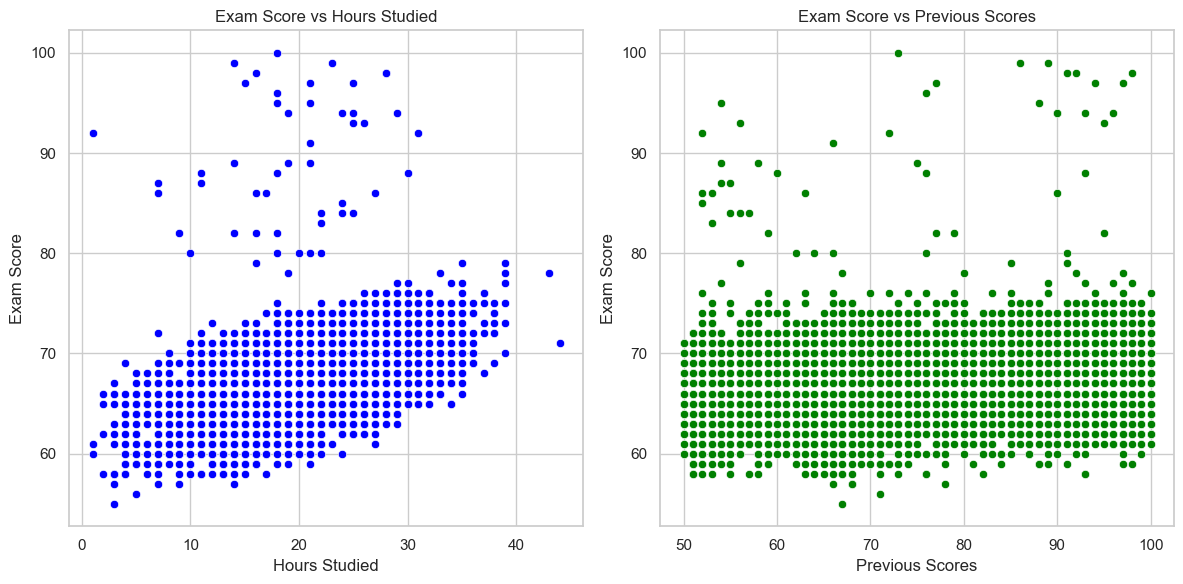

In [60]:
# Create scatter plots for Exam_Score vs other numerical features
plt.figure(figsize=(12, 6))

# Exam_Score vs Hours_Studied
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', color='blue')
plt.title('Exam Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

# Exam_Score vs Previous_Scores
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Previous_Scores', y='Exam_Score', color='green')
plt.title('Exam Score vs Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()


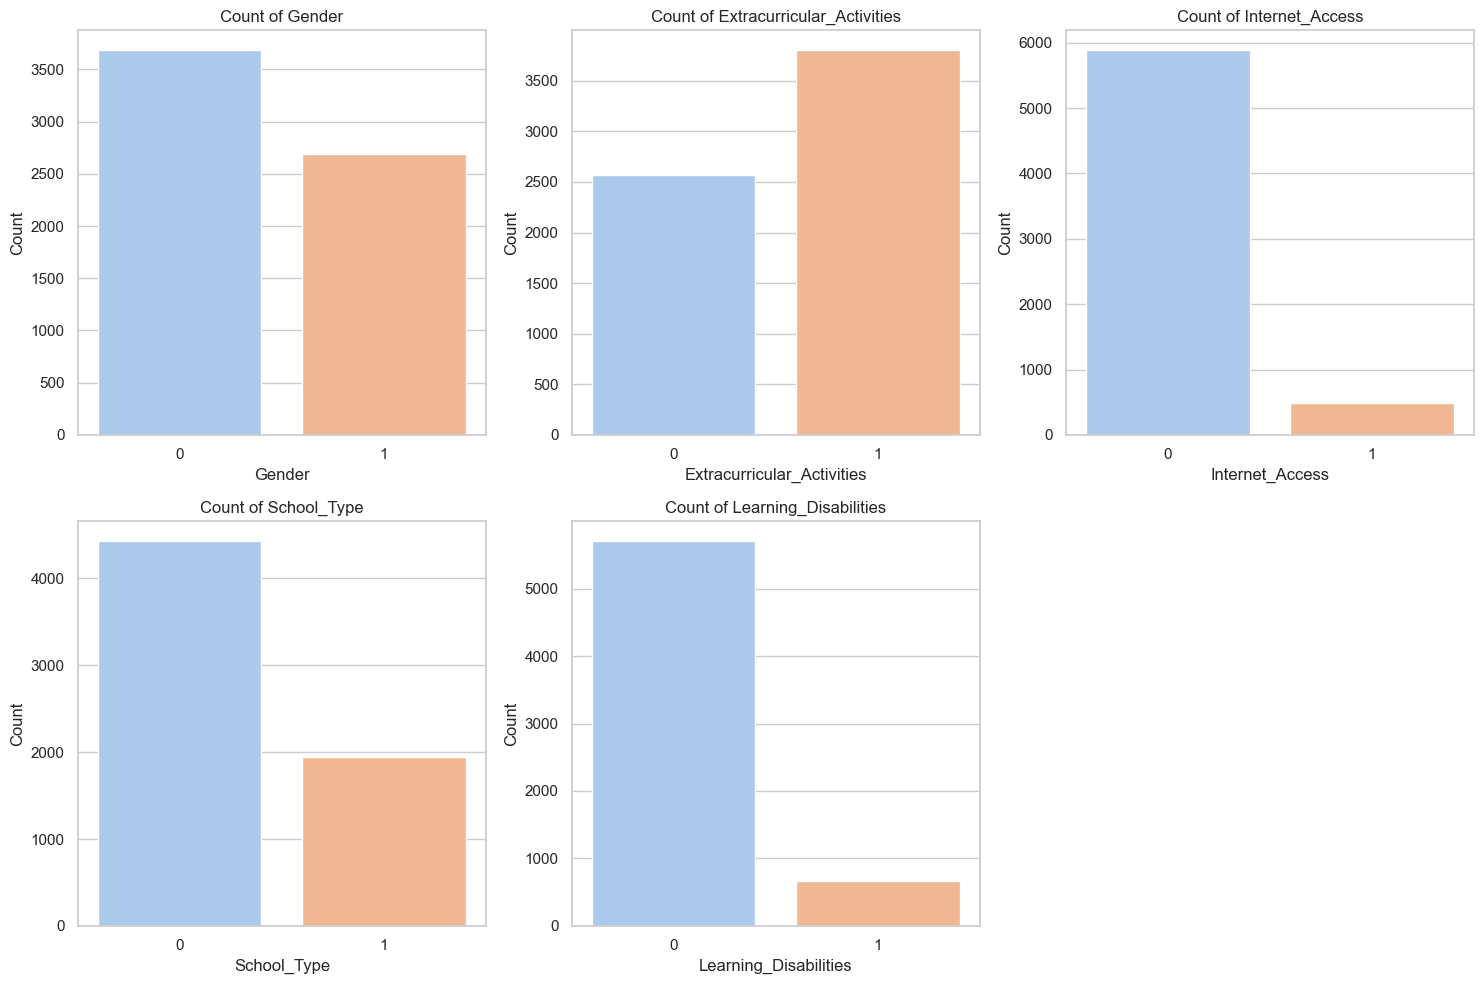

In [67]:
# Count Plot of Categorical Features
categorical_features = ['Gender', 'Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=feature, palette='pastel')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### VI. Ask Meaningful Question

#### 1. Question 1:

In [61]:
# Code here

Comment:

#### 2. Question 2:

In [62]:
# Code here

Comment: 

#### 3. Question 3: 

In [63]:
# Code here

Comment:

#### 4. Question 4: 

In [64]:
# Code here

Comment